In [1]:
import matplotlib.pyplot as plt

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis

In [2]:
N = 64
T = 1.0

sim_p0 = AdvectionSolver(
    ic=lambda array_slicer, x, y, z, t, xp: ic.square(
        array_slicer, x, y, z, vx=1, xp=xp
    ),
    nx=N,
    p=1,
)
sim_p0.run(T)

sim_mh = AdvectionSolver(
    ic=lambda array_slicer, x, y, z, t, xp: ic.square(
        array_slicer, x, y, z, vx=1, xp=xp
    ),
    nx=N,
    p=1,
    flux_recipe=2,
    MUSCL=True,
    MUSCL_limiter=None,
)
sim_mh.ssprk2(T)

Step #81 @ t=1.00e+00 | dt=1.55e-15 | (done)                                                        
Step #81 @ t=1.00e+00 | dt=1.55e-15 | (done)                                                        


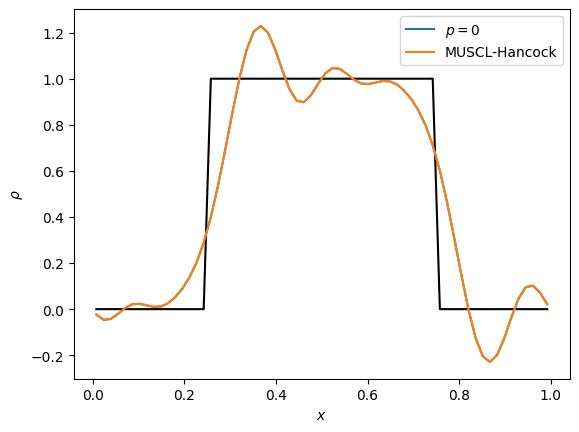

In [3]:
fig, ax = plt.subplots(1, 1)
ax.set_ylabel(r"$\rho$")
vis.plot_1d_slice(sim_p0, ax, "rho", t=0, color="k")
vis.plot_1d_slice(sim_p0, ax, "rho", label=r"$p=0$")
vis.plot_1d_slice(sim_mh, ax, "rho", xlabel=True, label="MUSCL-Hancock")
ax.legend()